# Naïve Bayes algorithm on the Titanic dataset

- Deekshitha Gona Id: 2399282
- Yuzhen Hu  Id: 2299391
- Jayaprakash Yadav Guntumani Id: 2391724
- Aakanksha Govindaraju Id: 2384001
- George Dani Id: 1844097

# Part I: Explain Laplace smoothing (for example, see reference [1]).
### Laplace Smoothing

Laplace smoothing is a technique used in probability models like Naive Bayes to avoid zero probabilities for events not seen in the training data. If a word does not appear in a given class during training, it can lead to a zero probability, making the model overly confident that this word is impossible for that class.

#### Without Smoothing
The probability of a word \( j \) in a class \( c \) is typically calculated as:

$$
\phi_j = \frac{\text{count of word } j \text{ in class } c}{\text{total words in class } c}
$$

#### With Laplace Smoothing
To avoid zero probabilities, we add 1 to each word count, adjusting the probability estimate to:

$$
\phi_j = \frac{1 + \text{count of word } j \text{ in class } c}{\text{vocabulary size} + \text{total words in class } c}
$$

This ensures every word has a small, non-zero probability, making the model more robust to new data with previously unseen words.

#### Benefits of Laplace Smoothing
- **Avoids zero probabilities** for unseen words.
- **Improves generalization** to new data.


# Part II: Build a Naïve Bayes algorithm on the Titanic dataset (attached to OneDrive) to predict whether a passenger survived or not.

 ### 1) Use sklearn NB on continuous data 

In [95]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB


In [112]:

file_path = 'train.csv'
df = pd.read_csv(file_path)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Exploration

## 1. Survival Rate by Passenger Class, Sex aand Embarked

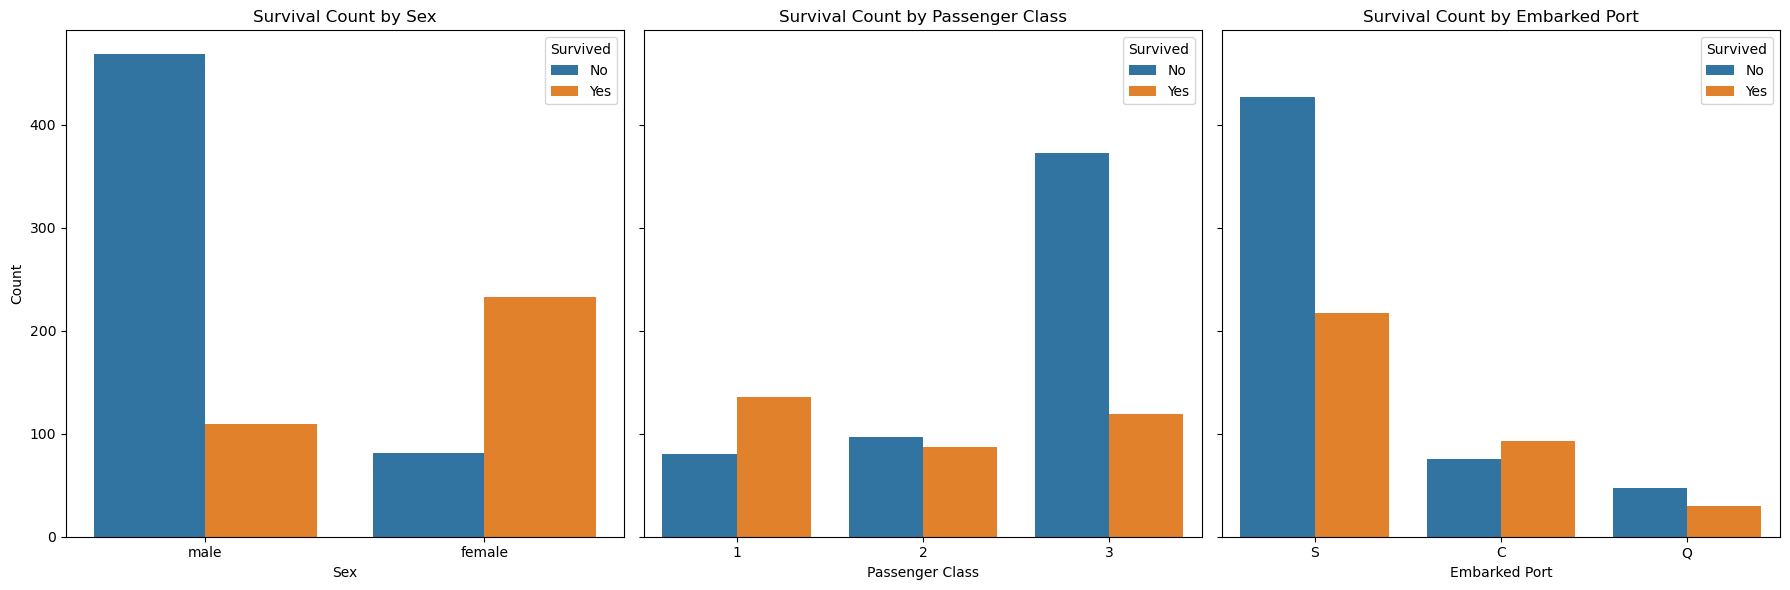

In [113]:

# Set up the figure and axes for a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot survival by Sex
sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[0])
axes[0].set_title("Survival Count by Sex")
axes[0].set_xlabel("Sex")
axes[0].set_ylabel("Count")
axes[0].legend(title="Survived", labels=["No", "Yes"])

# Plot survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df, ax=axes[1])
axes[1].set_title("Survival Count by Passenger Class")
axes[1].set_xlabel("Passenger Class")
axes[1].set_ylabel("")
axes[1].legend(title="Survived", labels=["No", "Yes"])

# Plot survival by Embarked Port
sns.countplot(x='Embarked', hue='Survived', data=df, ax=axes[2])
axes[2].set_title("Survival Count by Embarked Port")
axes[2].set_xlabel("Embarked Port")
axes[2].set_ylabel("")
axes[2].legend(title="Survived", labels=["No", "Yes"])

# Display the combined plot
plt.tight_layout()
plt.show()


# Check with missing data and fill it 

In [114]:
df[['Survived', 'Pclass', 'Sex','Age','SibSp','Parch', 'Fare','Cabin','Embarked']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


##  As we can read that 'Cabin' has a lot of missing values, we are going to drop this column for model predction

In [115]:
print("Unique values in SibSp:", df['SibSp'].unique())
print("Unique values in Patch:", df['Parch'].unique())
print("Unique values in Embarked:", df['Embarked'].unique())



Unique values in SibSp: [1 0 3 4 2 5 8]
Unique values in Patch: [0 1 2 5 3 4 6]
Unique values in Embarked: ['S' 'C' 'Q' nan]


In [116]:
from sklearn.impute import SimpleImputer

# Define imputers for different columns
age_imputer = SimpleImputer(strategy='median')
embarked_imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputers to specific columns
df['Age'] = age_imputer.fit_transform(df[['Age']])

df['Embarked'] = embarked_imputer.fit_transform(df[['Embarked']]).ravel()



In [117]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##  Encoding categorical variable,  label_encoding for 'Sex' and one-hot encoding for' Embarked'

In [118]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
# One-hot encode `Embarked`
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [119]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,False,True


## Select feature and targe variable for training dataset

In [120]:
# Define df_id
df_id = df[['PassengerId']]

# Define df_target to contain the target variable (e.g., Survived)
df_target = df[['Survived']]

# Define df_feature to contain the features used for prediction
df_feature = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q','Embarked_S']]


In [121]:
X_train = df_feature
y_train = df_target

# Preprocessing the same way with  test dataset

In [124]:

test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [87]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Imputer test dataset missing data

In [126]:
age_imputer_test = SimpleImputer(strategy='median')
fare_imputer = SimpleImputer(strategy='median')

test_df['Age'] = age_imputer_test.fit_transform(test_df[['Age']])

test_df['Fare'] = fare_imputer.fit_transform(test_df[['Fare']])



## Encoding categorical variables

In [127]:
test_df['Sex'] = label_encoder.fit_transform(test_df['Sex']) # label encoding for 'sex' variable
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)  # one hot encoding for 'Embarked'  nominal variable

In [128]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,False,True
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,True,False
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,False,True


## Get test dataset

In [90]:

X_test = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q','Embarked_S']]


In [130]:
submission_df = pd.read_csv('gender_submission.csv')
y_test = submission_df['Survived']

In [137]:
y_train = y_train.iloc[:, 0]

# Experimenting with GaussianNB model  

In [140]:

model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Evaluate the GasussianNB model 

Accuracy: 0.9186602870813397

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       266
           1       0.84      0.96      0.90       152

    accuracy                           0.92       418
   macro avg       0.91      0.93      0.91       418
weighted avg       0.93      0.92      0.92       418


Confusion Matrix:
 [[238  28]
 [  6 146]]


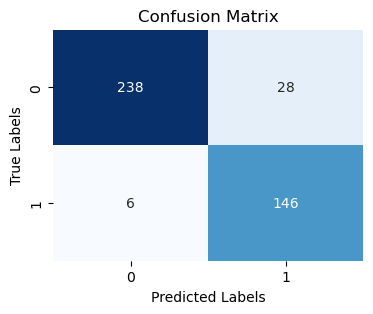

In [141]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


**With GuassianNB, accuracy is around 91.87% ,with confusion matrix and  classification Report show above.**

# Experimenting with MultinomialNB model  
##  with  multinomialNB, we need to discretize continuous fetures KBinsDiscretizer on training data and test


In [152]:
from sklearn.preprocessing import KBinsDiscretizer

# Discretize continuous features using KBinsDiscretizer on training data
age_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', subsample=None)
fare_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', subsample=None)

# Fit on training data and transform both training and test data
df['Age'] = age_discretizer.fit_transform(df[['Age']])
test_df['Age'] = age_discretizer.transform(test_df[['Age']])

df['Fare'] = fare_discretizer.fit_transform(df[['Fare']])
test_df['Fare'] = fare_discretizer.transform(test_df[['Fare']])

# Define the feature matrices consistently
#X_train = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
#X_test = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
# Define the feature matrices consistently
X_train = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
X_test = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]


In [164]:


# Train the final model with the best alpha
model = MultinomialNB()
model.fit(X_train, y_train)



MultinomialNB()

Accuracy with best alpha: 0.7272727272727273

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.94      0.81       266
           1       0.78      0.35      0.48       152

    accuracy                           0.73       418
   macro avg       0.75      0.65      0.65       418
weighted avg       0.74      0.73      0.69       418



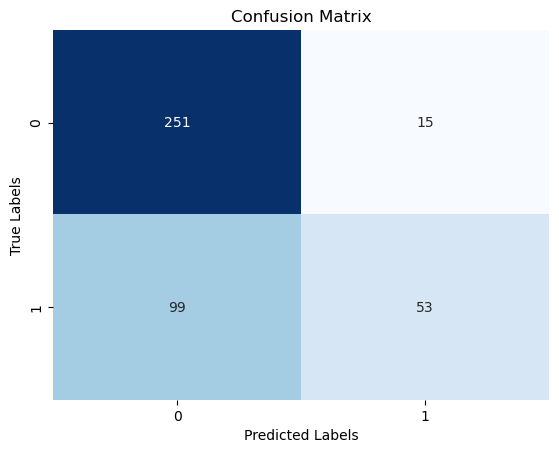

In [165]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with best alpha:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Accuracy is  73%